Во временных рядах нередко присутствует периодическая (сезонная) составляющая. Например, продажи в магазинах растут в субботу и воскресение, а также в канун Нового Года или Рождества. Рост пассажиропотока увеличивается к летним месяцам. Таких сезонных составляющих может быть много, и выявить на глаз их непросто. Поясню детально, как выделить сезонность во временных рядах.

Буду писать максимально просто, без формул. Если нужно более детальное описание — в конце статьи дан список ссылок.

Для начала смоделируем временной ряд. Предположим, что у нас есть данные о продажах за years = 3 года с периодом взятия выборки (семплирование) T = 1 день.


Если бы такой временной ряд был аналоговым (непрерывным) сигналом, то T — был бы период дискретизации. Именно с таким интервалом исходный сигнал перемножался бы на дельта-функцию (гребенки Дирака). В случае с временным рядом данные уже дискретные.


о временных рядах нередко присутствует периодическая (сезонная) составляющая. Например, продажи в магазинах растут в субботу и воскресение, а также в канун Нового Года или Рождества. Рост пассажиропотока увеличивается к летним месяцам. Таких сезонных составляющих может быть много, и выявить на глаз их непросто. Поясню детально, как выделить сезонность во временных рядах.

Буду писать максимально просто, без формул. Если нужно более детальное описание — в конце статьи дан список ссылок.

Для начала смоделируем временной ряд. Предположим, что у нас есть данные о продажах за years = 3 года с периодом взятия выборки (семплирование) T = 1 день.


Предположим, что в графике продаж присутствуют следующие сезонные факторы:

Годовой — на Новый Год/Рождество продажи растут, люди затариваются подарками.
Квартальный — ежеквартально люди получают бонусы, у них появляется больше денег, и они склонны больше тратить.
Еженедельный — на субботу и воскресение продажи подрастают, поскольку люди склонны шататься по торговым центрам, закупаясь на неделю продуктами и параллельно заходя в смежные магазины.
Есть некоторый искажающий фактор (шум), влияющий на объем продаж.
Поскольку я хочу построить на Python красивый график временного ряда с отложенными по оси x датами, а не номером отсчета, то временной ряд создам с помощью Pandas.DataFrame.








Зачастую в исследуемых выборках замечается т.н. сезонность. Грубо говоря переодический процесс повторяющийся в определенные промежутки. Например корнеполдные овощи по типу картофеля или моркови обычно собираются в августе, а уже начиная с сентября в магазинах можно видеть значительное понижение цен на данные позиции. Или увеличение количества уровня воды в водоемах в весенний период тоже можно отнести к факторам сезонности

Давайте попробуем разобраться как же эту пресловуют сезоность выявлять.


Для начала смоделируем временной ряд. Предположим, что у нас есть данные о продажах за years = 3 года с периодом взятия выборки (семплирование) в T = 1 день.

Если бы такой временной ряд был аналоговым (непрерывным) сигналом, то T — был бы период дискретизации. Именно с таким интервалом исходный сигнал перемножался бы на дельта-функцию (гребенки Дирака). В случае с временным рядом данные уже дискретные.

Предположим, что в графике продаж присутствуют следующие сезонные факторы:

Годовой — на Новый Год/Рождество продажи растут, люди затариваются подарками.
Квартальный — ежеквартально люди получают бонусы, у них появляется больше денег, и они склонны больше тратить.
Еженедельный — на субботу и воскресение продажи подрастают, поскольку люди склонны шататься по торговым центрам, закупаясь на неделю продуктами и параллельно заходя в смежные магазины.
Есть некоторый искажающий фактор (шум), влияющий на объем продаж.
Поскольку я хочу построить на Python красивый график временного ряда с отложенными по оси x датами, а не номером отсчета, то временной ряд создам с помощью Pandas.DataFrame.





In [1]:
# Импортируем библиотеки
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt #Отрисовка графиков
# if using a jupyter notebook
%matplotlib inline 

# Зададим колиечество лет для исследования
years = 3               

# Зададим количество месяцев в году
months = 12            

# Зададим количество кварталов в году
quarters = 4           

# Задим количество недель в месяце
weeks = 4               

# Группировка параметров
GBPUSD = pd.DataFrame(columns=['date_time', 'value'])

# Начальная дата для исследования
start_date = date(2017, 1, 1)
# Конечная дата для исслевдования
end_date = start_date.replace(year=start_date.year + years)
# Продолжительность
time = pd.date_range(start = start_date, end = end_date, freq = 'D')
print(start_date, end_date, time.shape[0])
GBPUSD['date_time'] = time
GBPUSD.index = time

2017-01-01 2020-01-01 1096



Возьмем первоначальную  дату 01.01.2017 в качестве начала временного ряда и добавим количество years = 3, задав частоту дискретизации freq = ‘D’ равной T = 1 день.

В случае с аналоговым сигналом, например, звуковым, по теореме Котельникова, выборки берутся с частотой, равной удвоенной максимальной частоте исходного сигнала. Например, для оцифровки audio CD используется частота дискретизации (SR — sampling rates) 44,1 кГц, т.е. от аналогового сигнала берутся выборки 44100 раз в секунду, с небольшим запасом, поскольку максимальная частота слышимого человеком звукового сигнала лежит в диапазоне 20 Гц — 20 кГц.

В случае с временным рядом, описывающим продажи за определенный промежуток времени, аналогом общепринятого в цифровой обработке сигналов промежутка в 1 сек., выступает весь интервал взятия выборок, т.е. SR = количеству дней за 3 года.


In [2]:
#Total number of samples in the time series
#Общее количество выборок во временном ряду
SR = time.size                                              

#Frequency for the year period
# Частота в годовом периоде
f_year = years    

#Frequency for the week period
# Частота в недельном периоде
f_quarter = years*quarters                                  

#The phase shift
# Сдвиг по фазе
f_week = years*months*weeks                                 

#The phase shift
# Сдвиг по фазе
fi = np.pi/2                                                

#Generate time axis
# Зададим ось времени
t = np.linspace(0, SR, SR)                                  

#Create time series for years
# Задим время в течении года
y_year = np.sin(2*np.pi*f_year*t + fi) + 1             

# Задим время в течении квартала
y_quarter = 0.7*np.sin(2*np.pi*f_quarter*t + fi) + 1   

# Задим время в течении недели
y_week = 0.5*np.sin(2*np.pi*f_week*t + fi) + 3        

# Создадим шум
noise = np.random.uniform(-1.,1., SR)                       

# Объединить все временные ряды
y_mix = y_year + y_quarter + y_week + noise + 1.5          

Соответственно определим следующее:

f_year = years = 3 — частота повторения по годам. Данные у нас взяты за 3 года, соответственно, частота будет равна 3, поскольку гармоническая функция должна трижды повториться на интервале в 3 года.

f_quarter = years*quarters = 12 — квартальная частота повторения. За 3 года будет 12 повторений динамики роста цен.

f_week = years*months*weeks = 144 — недельные повторения. Их за 3 года будет 144 шт.

Чтобы визуально гармонические составляющие для годовых, квартальных и недельных сезонных составляющих хорошо визуализировались на графике, я добавил постоянную составляющую для сдвига по оси y. 

Кроме того, в этом случае сезонные составляющие получаются более физичными, поскольку отрицательные продажи — это убыток. 🙂 В реальности вместо постоянной составляющей будет некоторая более сложная, например, экспоненциальная зависимость, но в данном примере для простоты такие сложности я опускаю.

Фаза fi = pi/2 смещает максимальное значение на начало года, делая более физичным, поскольку максимум продаж приходится на дату в районе 1 января каждого года. Можно было вместо sin взять cos, чтобы не добавлять фазовый сдвиг.


Поскольку на данный момент в качестве time берется ряд дат, для формирования временной последовательности, которую можно будет подать в качестве аргумента для sin, нужно сформировать числовую последовательность. Количество отсчетов в последовательности должно быть равно количеству дат в исходном ряде. 

В данном случае максимальное значение в ряде равно SR, и общее количество отсчетов (третий аргумент функции) взято также SR.

Если это количество, например, удвоить, то придется корректировать исходный временной ряд, чтобы данные были за полдня. Иначе при построении графика размеры выборок для time и амплитуд не совпадут.

In [3]:
# Создадим массив для оси времени
t = np.linspace(0, SR, SR)                                  

Частота квартальная: 12
Частота недельная: 144


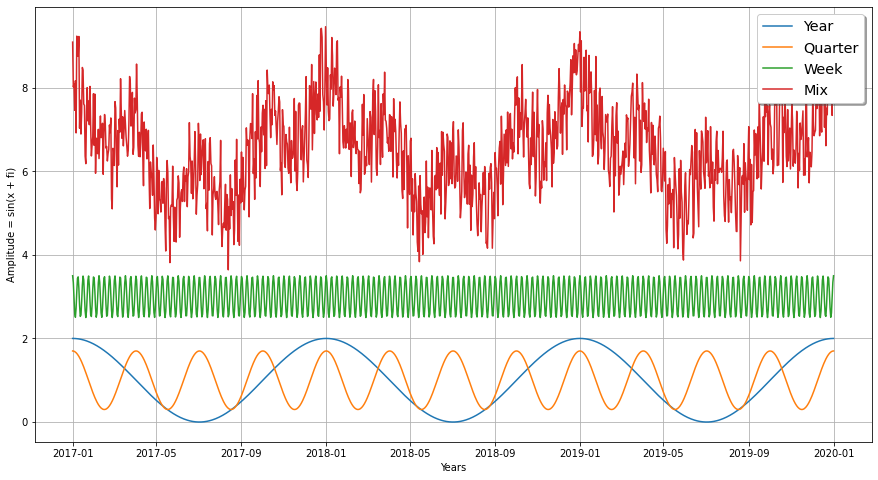

In [4]:
# Отобразим созданные временные ряды на графике.
print("Частота квартальная:", f_quarter)
print("Частота недельная:", f_week)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.ylabel('Amplitude = sin(x + fi)')
plt.xlabel('Years')
plt.grid(True, which='both')
plt.plot(time, y_year, label='Year')
plt.plot(time, y_quarter, label='Quarter')
plt.plot(time, y_week, label='Week')
plt.plot(time, y_mix, label='Mix')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('C0')
plt.show()



Для аналогового сигнала, подвергающегося цифровой обработке, важен параметр N — количество отсчетов в последовательности. Например, частота дискретизации 44,1 кГц, но для обработки подали данные не за 1 секунду, а полсекунды, т.е. N = 44100/2 = 22050 шт. В моем случае N = SR.

Дискретное преобразование Фурье
Любой временной ряд может быть представлен в виде суммы гармонических функций с различными амплитудами, частотами и фазами. Подобный ряд гармонических функций называется рядом Фурье. Трансформация сигнала во временной области в частотную называется преобразованием Фурье.


Нередко расширение (augmentation) временного ряда дополнительными рядами с некоторой матобработкой перед подачей на нейронную сеть позволяет существенно улучшить качество прогноза нейронкой. Поэтому предварительный анализ временного ряда различными преобразованиями, в т.ч. Фурье весьма полезны.

Как уже упоминалось ранее, частота дискретизации и длина входного массива равны: N = SR. Я воспользовался встроенными функциями Python numpy для дискретного преобразования Фурье. Поскольку сигнал действительный, то для ускорения использовалась функция rfft.


In [5]:
#SR = t.size  #частота дискретизации, отсчётов в секунду
N = SR # длина входного массива.
# Вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = np.fft.rfft(y_week)
orig = spectrum.copy()
freq = np.fft.rfftfreq(N, 1./SR) #Frequency axis
spectrum = 1/N * np.abs(spectrum)
spectrum[1:] = spectrum[1:]*2 # Удваиваем значение амплитуды всех гармоник за исключением 0-й 

Амплитуда 0-й гармоники (постоянная составляющая — сдвиг по оси y) не требует преобразования по амплитуде. Амплитуду других гармоник необходимо умножить на 2, чтобы получить корректное значение амплитуды исходного гармонического сигнала.

Поскольку речь идет о временных рядах, а не о сигнале, использовать размерность Гц некорректно. В данном случае частота, равная 144, говорит не о 144 изменениях гармонической функции в секунду, а о 144 изменениях за период в 3 года.



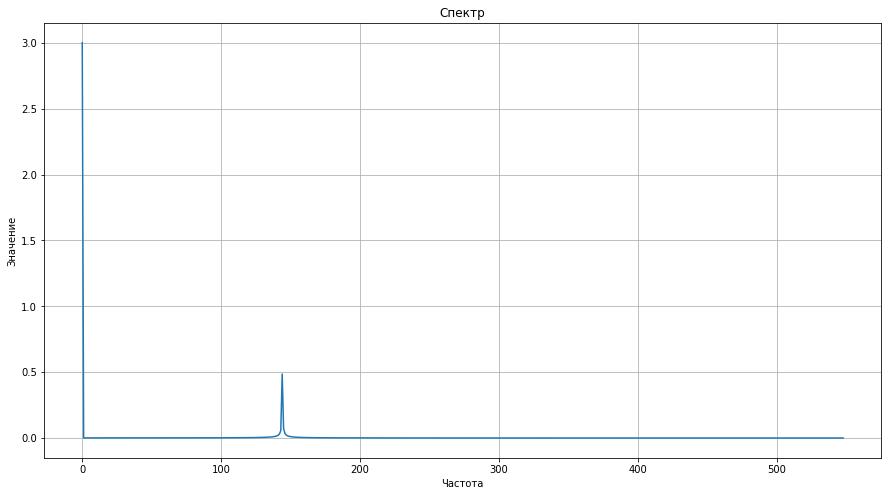

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq, spectrum)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в частоту
# интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы скорректировать амплитуду. Постоянные составляющие должны совпадать в смоделированном гармоническом сигнале и в спектре
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

Отмечу, что полученная постоянная составляющая равна 3, что соответствует исходной величине амплитуды, заданной при создании функции. Постоянная составляющая (0-я гармоника) нередко значительная, поэтому отобразим на другом графике полученное преобразование, исключив гармонику с 0-й частотой.

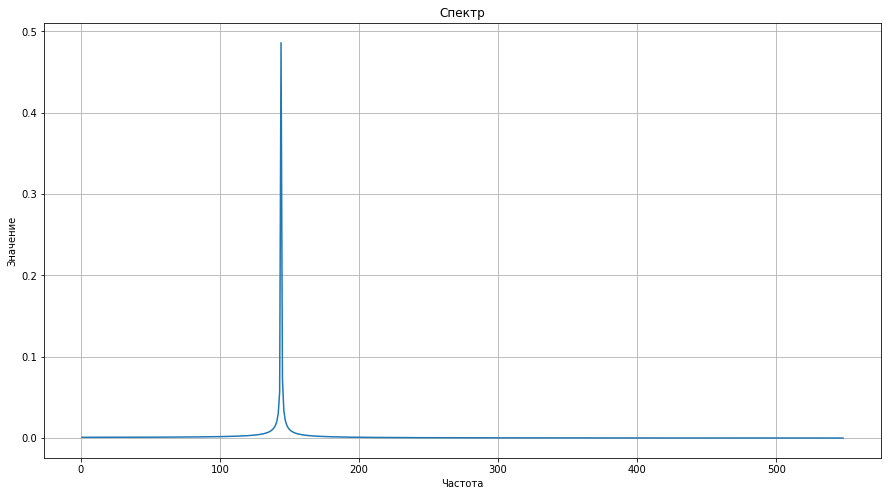

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq[1:], spectrum[1:])
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

Как видно по графику, на частоте, равной 144, выявлена гармоника с амплитудой 0.5, что соответствует заданной при моделировании временного ряда.

Если сделать преобразование Фурье для смешанного временного ряда, заменив аргумент на y_mix

In [8]:
spectrum = np.fft.rfft(y_mix)

c:\users\evgen\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


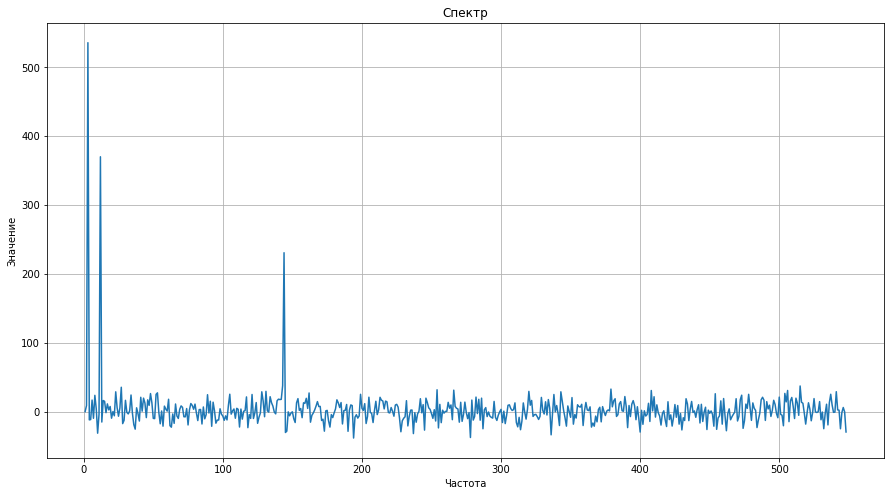

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq[1:], spectrum[1:])
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

На спектре хорошо различима 0-я гармоника с величиной 6.5 и 3 другие гармоники. Если отбросить нулевую, то видно, что амплитуда самой низкой (годовая с частотой = 3) в районе 1, квартальная в районе 0.7 и недельная в районе 0.5 на фоне гармоник «белого шума» с низкой амплитудой.

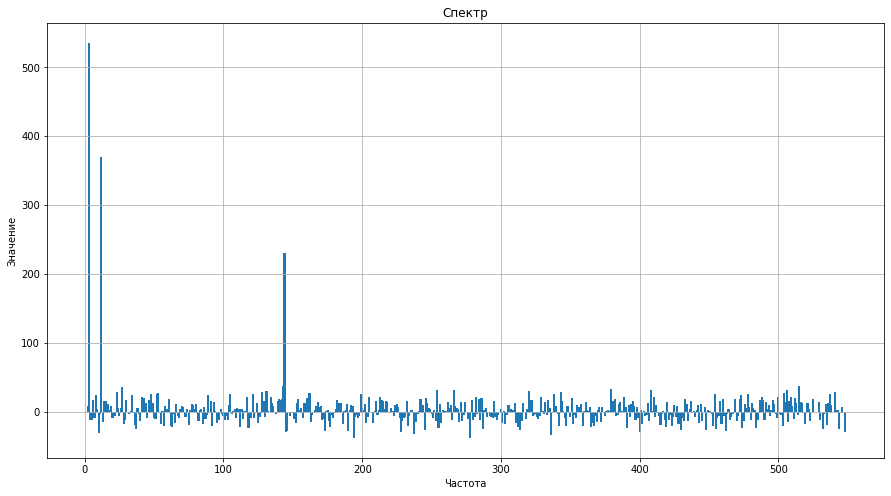

In [10]:
# В виде столбчатой диаграмы
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.bar(freq[1:], spectrum[1:] , width=1.5)
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
plt.show()

В частотной области легко произвести очистку исходного временного ряда, отбросив значения ниже определенного уровня, соответствующие шуму, и оставив только нужные гармоники. Затем можно произвести обратное преобразование Фурье и получить исходный временной ряд, очищенный от шума с помощью обратного преобразования Фурье.

In [11]:
spectrum = np.fft.irfft(orig)

Фильтруем шумы в частотной области, убрав гармоники с амплитудой меньше 70 (цифра в исходном ряде до деления амплитуды на N)

In [12]:
orig_wo_noise = orig.copy()
orig_wo_noise[orig_wo_noise < 70] = 0

Теперь спектр сигнала чистенький, без вкраплений шума.



После обратного преобразования Фурье получаем чистенький временной ряд без шума. Во временной области удаление шума было бы довольно проблематично реализовать.

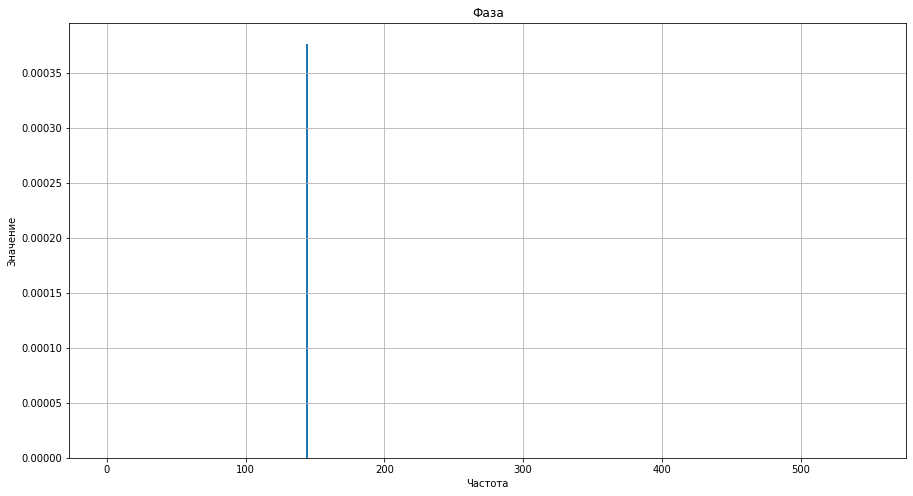

In [13]:
phs = 1/N * np.angle(orig_wo_noise)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.bar(freq[1:], phs[1:] , width=1.5)
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Фаза')
plt.grid(True)
plt.show()
